In [1]:
# importing all needed functions
import os
import shutil
import json
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
from fast_histogram import histogram1d
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
from astropy.io import ascii
import matplotlib.patches as mpatches
from matplotlib import rc,rcParams
from astropy.table import Table
%matplotlib inline
# %matplotlib notebook
from astropy.io import fits
from numpy import arange
import json
import subprocess
from Calculating_det_angles import estimate_source_angles_detectors #importing ma'ams function
import matplotlib.image as mpimg
import pathlib
from pathlib import Path

In [10]:
NaI_detector = r"C:\Users\arpan\OneDrive\Documents\GRB\data\temp0-old\GRB_bn081017474"
event_path = r"C:\Users\arpan\OneDrive\Documents\GRB\data\temp0-old\GRB_bn081017474"

# Use the glob module to search for TTE files in the directory
target_string = "_tte_"
file_pattern = str(Path(event_path) / Path('current') / f"*{target_string}*")
NaI_detectors = glob.glob(file_pattern)

In [11]:
print(NaI_detectors)

['C:\\Users\\arpan\\OneDrive\\Documents\\GRB\\data\\temp0-old\\GRB_bn081017474\\current\\glg_tte_n6_bn081017474_v01.fit']


In [49]:
def get_zero_indices(a):
    last_leading_zero_index = None
    first_trailing_zero_index = None

    # Find the last leading zero index
    i = 0
    while i < len(a) and a[i] == 0:
        last_leading_zero_index = i
        i += 1

    # Find the first trailing zero index
    i = len(a) - 1
    while i >= 0 and a[i] == 0:
        first_trailing_zero_index = i
        i -= 1

    return last_leading_zero_index, first_trailing_zero_index

None None


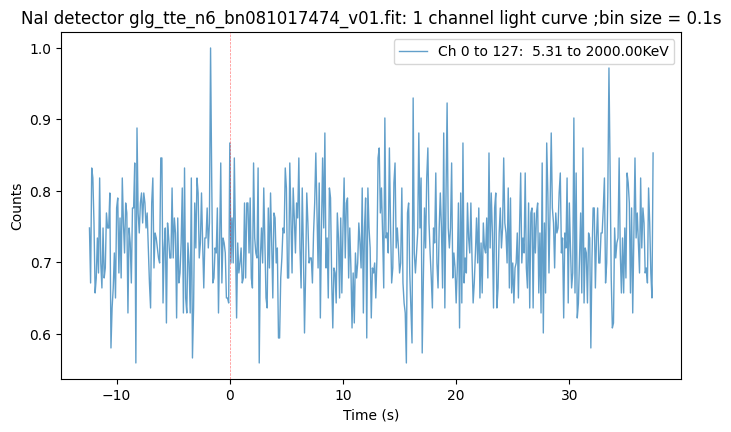

95 426


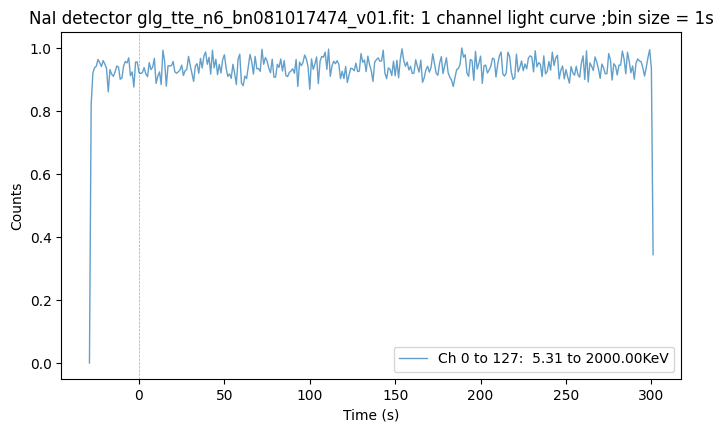

118 186


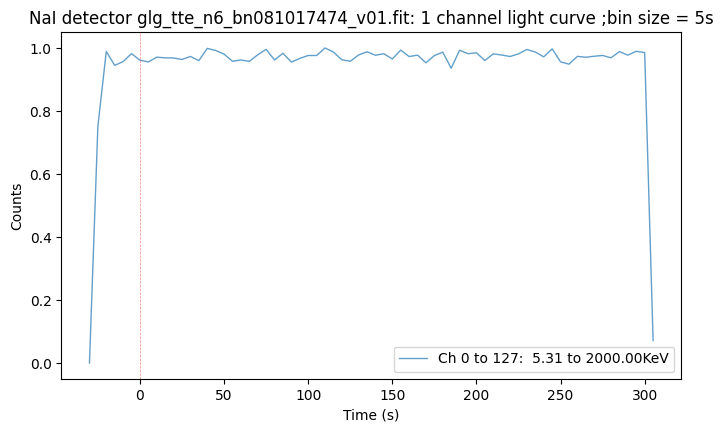

In [54]:
#Multichannel LightCurve

channel_number = 1 # set to number of desired channels

all_count_data = []
for NaI_detector in NaI_detectors:
    # Open the FITS file
    hdul = fits.open(NaI_detector)
    # fetchinng data
    energy_channel_data = hdul[1].data
    all_count_data.append(np.array(hdul[2].data))
    hdul.close()


# Define the pre to post trigger ratio and number of bins
data_no = 500
r = 0.25

for i in [0.1,1,5]:#[0.001,0.005,0.01, 0.1, 0.5, 1, 5]:

    channel_start = 0
    channel_stop = int(128/channel_number)
    # Define the range and number of bins
    range_min = -data_no * i * r
    range_max =  data_no * i * (1-r)
        
    bin_size = i
    
    # Create bin edges
    bin_edges = np.arange(range_min, range_max, bin_size)

    # Create bin edges centered around 0
    bin_edges = np.arange(range_min, range_max, bin_size)

    plt.figure(figsize=(8,4.5))
    for k in range(channel_number):
        channels = list(np.arange(channel_start,channel_stop,1))
        counts = []

        for data in all_count_data:
            counts = counts + [float(count[0]) for count in data if int(count[1]) in channels]

        energy_range = f"{energy_channel_data[channels[0]][1]:.2f} to {energy_channel_data[channels[-1]][-1]:.2f}KeV"
        
        # # Plot the histogram
        # plt.hist(counts, bins=bin_edges,histtype='step', alpha=0.7, linewidth=1,label = f'Ch {channels[0]} to {channels[-1]}:  ' + energy_range)

        # Create the histogram using numpy.histogram
        hist, edges = np.histogram(counts, bins=bin_edges)

        # Calculating rates
        hist = hist / i

        # Find Peak
        peak = np.argmax(hist)

        # normalize with largest peak
        hist = hist / max(hist)

        edges = edges[1:]

        a,b = get_zero_indices(hist)
        print(a,b)
        
        plt.plot(edges[a:b],hist[a:b], alpha=0.7, linewidth=1,label = f'Ch {channels[0]} to {channels[-1]}:  ' + energy_range)
        
        channel_start = channel_stop
        channel_stop = (k+2)*int(128/channel_number)

    plt.xlabel('Time (s)')
    plt.ylabel('Counts')
    plt.title(f'NaI detector ' + NaI_detector.split("\\")[-1] + f': {channel_number} channel light curve '+f";bin size = {bin_size}s")
    plt.legend()

    # Add a vertical line at x=0
    plt.axvline(x=0, color='red',alpha = 0.5, linestyle='--',linewidth=0.5)

    # Show the plot
    plt.show()


In [3]:
NaI_detector = r"D:\GRB_data\500_data_set\GRB_bn080714745\current\glg_tte_n4_bn080714745_v01.fit"

# Read data from FITS file
with fits.open(NaI_detector, memmap=True) as hdul:
    all_count_data = hdul[2].data
    trigtime = float(hdul[2].header['TRIGTIME'])
    print(hdul[1].data)

[(  0,    4.3384   ,    5.2829137) (  1,    5.2829137,    6.198377 )
 (  2,    6.198377 ,    7.0901847) (  3,    7.0901847,    7.963732 )
 (  4,    7.963732 ,    8.824413 ) (  5,    8.824413 ,    9.677625 )
 (  6,    9.677625 ,   10.52876  ) (  7,   10.52876  ,   11.554979 )
 (  8,   11.554979 ,   12.595302 ) (  9,   12.595302 ,   13.65905  )
 ( 10,   13.65905  ,   14.755458 ) ( 11,   14.755458 ,   15.88723  )
 ( 12,   15.88723  ,   17.04615  ) ( 13,   17.04615  ,   18.222963 )
 ( 14,   18.222963 ,   19.606178 ) ( 15,   19.606178 ,   20.98761  )
 ( 16,   20.98761  ,   22.37029  ) ( 17,   22.37029  ,   23.769638 )
 ( 18,   23.769638 ,   25.201368 ) ( 19,   25.201368 ,   26.897448 )
 ( 20,   26.897448 ,   28.679811 ) ( 21,   28.679811 ,   30.571918 )
 ( 22,   30.571918 ,   32.597233 ) ( 23,   32.597233 ,   34.533524 )
 ( 24,   34.533524 ,   36.086002 ) ( 25,   36.086002 ,   37.67379  )
 ( 26,   37.67379  ,   39.304935 ) ( 27,   39.304935 ,   40.97711  )
 ( 28,   40.97711  ,   42.687992 )